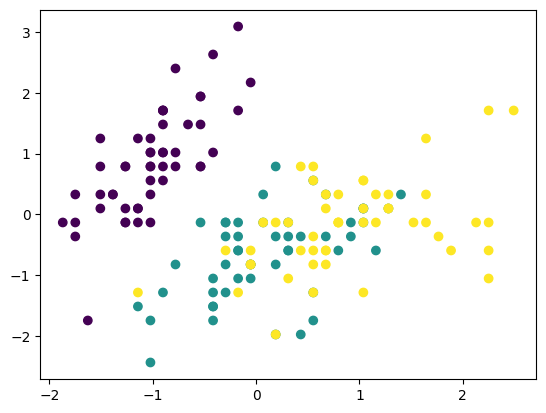

Silhouette Score: 0.3620608022195786
Davies-Bouldin Score: 1.061197324930631


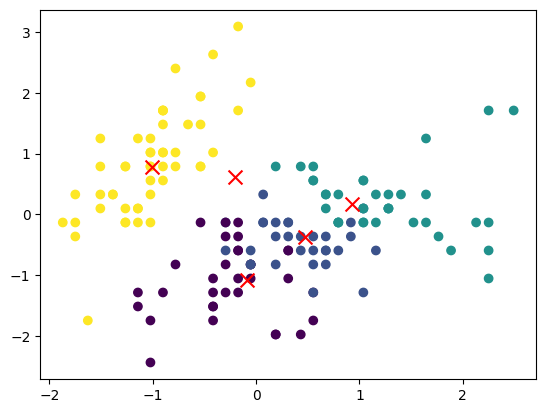

Cluster Centroids:
[[-0.09136672 -1.07185609  0.3090525   0.20099828]
 [ 0.47628229 -0.37299213  0.67808023  0.71560336]
 [ 0.92356023  0.17716005  0.88571002  1.01406162]
 [-0.20127907  0.6128635  -0.37256269 -0.26210822]
 [-1.00887086  0.78509434 -1.29493293 -1.19756841]]


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn_som.som import SOM
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Step 1: Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Pre-process the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Plot the datapoints
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y)
plt.show()
# Step 4: Apply SOM clustering
som = SOM(m=5, n=1, dim=4, random_state=42)  # Grid 3x1, dimensions match feature space
som.fit(X_scaled)

# Cluster labels
predicted_labels = som.predict(X_scaled)

# Step 5: Plot the clustered data
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=predicted_labels)

# Step 6: Measure performance
sil_score = silhouette_score(X_scaled, predicted_labels)
db_score = davies_bouldin_score(X_scaled, predicted_labels)
print(f'Silhouette Score: {sil_score}')
print(f'Davies-Bouldin Score: {db_score}')

# Step 7: Output cluster centroids
centroids = som.weights.reshape(-1, 4)
for centroid in centroids:
    # Project the centroids onto the first two principal components
    plt.scatter(centroid[0], centroid[1], marker='x', s=100, c='red')
plt.show()
print("Cluster Centroids:")
print(centroids)
